In [90]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC

In [91]:
df = pd.read_csv('training_dataset.csv')

In [92]:
df.shape

(6335, 4)

In [93]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [7]:
df = df.set_index('Unnamed: 0')

In [8]:
y = df.label

In [9]:
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [10]:
df = df.drop('label', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [15]:
tfidf_vectorizer.get_feature_names()[10:20]

['001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008']

In [16]:
count_vectorizer.get_feature_names()[10:20]

['001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008']

In [17]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [18]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [19]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [20]:
print(count_df.equals(tfidf_df))

False


In [21]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.01 Score: 0.90340
Alpha: 0.02 Score: 0.90196
Alpha: 0.03 Score: 0.89957
Alpha: 0.04 Score: 0.89861
Alpha: 0.05 Score: 0.89766
Alpha: 0.06 Score: 0.89766
Alpha: 0.07 Score: 0.89909
Alpha: 0.08 Score: 0.89718
Alpha: 0.09 Score: 0.89766


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [25]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88474
Alpha: 0.01 Score: 0.89240
Alpha: 0.02 Score: 0.89192
Alpha: 0.03 Score: 0.89335
Alpha: 0.04 Score: 0.89335
Alpha: 0.05 Score: 0.89335
Alpha: 0.06 Score: 0.89335
Alpha: 0.07 Score: 0.89287
Alpha: 0.08 Score: 0.89192
Alpha: 0.09 Score: 0.89287


In [26]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(hash_train, y_train)
    pred = nb_classifier.predict(hash_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.89144
Alpha: 0.01 Score: 0.90196
Alpha: 0.02 Score: 0.89957
Alpha: 0.03 Score: 0.89718
Alpha: 0.04 Score: 0.89622
Alpha: 0.05 Score: 0.89622
Alpha: 0.06 Score: 0.89240
Alpha: 0.07 Score: 0.89048
Alpha: 0.08 Score: 0.89048
Alpha: 0.09 Score: 0.88905


In [30]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   93.639 %
Confusion matrix, without normalization


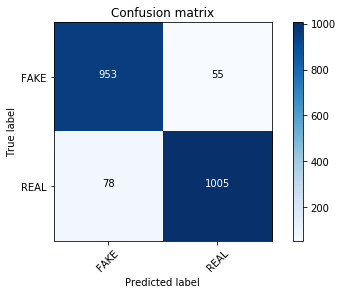

In [31]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [32]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):


    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.003909771610405 2016
FAKE -4.32480912588922 october
FAKE -4.162657132588901 hillary
FAKE -3.143283061290658 share
FAKE -2.955090864697698 november
FAKE -2.9043414994988086 article
FAKE -2.642714665685186 print
FAKE -2.5465461225311916 oct
FAKE -2.516078046207982 email
FAKE -2.354727868215646 war
FAKE -2.332077186691187 advertisement
FAKE -2.1203366267844976 mosul
FAKE -2.1112200312228206 source
FAKE -2.0416716577994354 election
FAKE -2.028670270037772 establishment
FAKE -2.0283019507205733 podesta
FAKE -1.9407960422134958 nov
FAKE -1.93138170806184 pipeline
FAKE -1.8974048053800947 snip
FAKE -1.878274614906794 wikileaks
FAKE -1.7976745418875462 jewish
FAKE -1.7758197869493753 28
FAKE -1.7728902747091253 26
FAKE -1.7534863748446083 corporate
FAKE -1.731646216284347 entire
FAKE -1.6938815192222731 brexit
FAKE -1.683266220373038 photo
FAKE -1.6778243945249347 ayotte
FAKE -1.6497111660300559 free
FAKE -1.6327075928826238 donald

REAL 4.6590049420750965 said
REAL 2.5377574242177476 

In [33]:
feature_names = tfidf_vectorizer.get_feature_names()

In [34]:
#real

In [35]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-7.667855112577802, 'intellectuality'),
 (-7.91088094130552, 'graham'),
 (-7.9152656084345105, 'tasteless'),
 (-7.948172090664642, 'simpsonson'),
 (-7.985656084730625, 'retract'),
 (-8.24583436376857, 'makes'),
 (-8.561593064101507, 'widespread'),
 (-8.787394422968909, 'intrepid'),
 (-8.805352660215268, 'pj65duqnjc'),
 (-9.004391037556005, 'yk1vjiolmd'),
 (-9.036957912963576, 'trove'),
 (-9.120294322515548, 'noose'),
 (-9.137569355849125, 'jillian'),
 (-9.29175661016963, '23rd'),
 (-9.29648887352269, 'bds'),
 (-9.446741927619945, 'fleshes'),
 (-9.459557437496215, '00'),
 (-9.486847033350518, 'jive'),
 (-9.502175633474815, 'suppressing'),
 (-9.523067558695399, 'interning')]

In [36]:
#FAKE

In [37]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-14.08884924582259, '000'),
 (-14.08884924582259, '0000'),
 (-14.08884924582259, '00000031'),
 (-14.08884924582259, '000035'),
 (-14.08884924582259, '00006'),
 (-14.08884924582259, '0001'),
 (-14.08884924582259, '0001pt'),
 (-14.08884924582259, '000ft'),
 (-14.08884924582259, '000km'),
 (-14.08884924582259, '001'),
 (-14.08884924582259, '0011'),
 (-14.08884924582259, '002'),
 (-14.08884924582259, '003'),
 (-14.08884924582259, '004'),
 (-14.08884924582259, '006'),
 (-14.08884924582259, '006s'),
 (-14.08884924582259, '007'),
 (-14.08884924582259, '008'),
 (-14.08884924582259, '008s'),
 (-14.08884924582259, '009')]

In [38]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [39]:
clf = MultinomialNB(alpha=.01)

accuracy:   90.196  %
Confusion matrix, without normalization


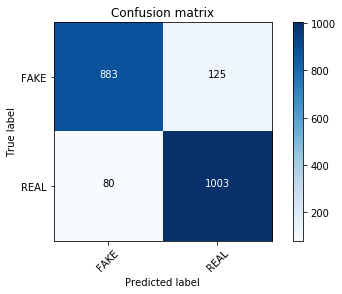

In [40]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f " % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [41]:
clf = PassiveAggressiveClassifier(n_iter=50)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   91.918  %
Confusion matrix, without normalization


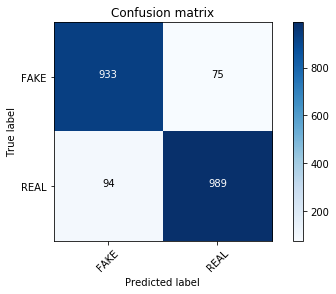

In [42]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f " % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
################################

In [44]:
mn_count_clf = MultinomialNB(alpha=0.1) 

In [45]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")

accuracy:   89.287 %


In [46]:
mn_tfidf_clf = MultinomialNB(alpha=0.1) 

accuracy:   89.766 %
Confusion matrix, without normalization


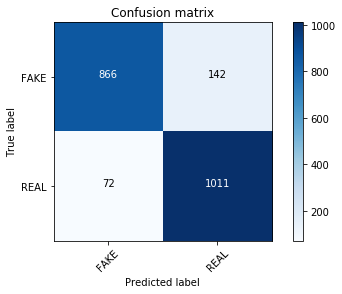

In [47]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [48]:
mn_hash_clf = MultinomialNB() 

accuracy:   85.222 %
Confusion matrix, without normalization


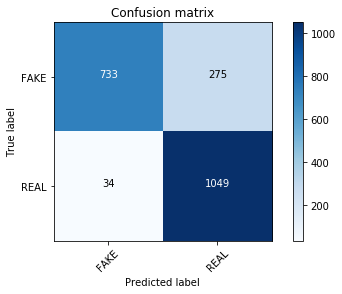

In [49]:
mn_hash_clf.fit(hash_train, y_train)
pred = mn_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [50]:
pa_count_clf = PassiveAggressiveClassifier(n_iter=13)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   89.479 %
Confusion matrix, without normalization


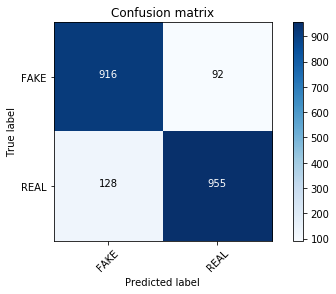

In [51]:
pa_count_clf.fit(count_train, y_train)
pred = pa_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [52]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=3)

accuracy:   93.544 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


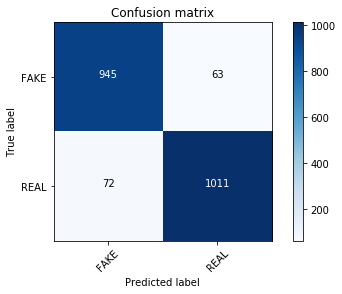

In [53]:
pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [54]:
pa_hash_clf = PassiveAggressiveClassifier(n_iter=3)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   92.013 %
Confusion matrix, without normalization


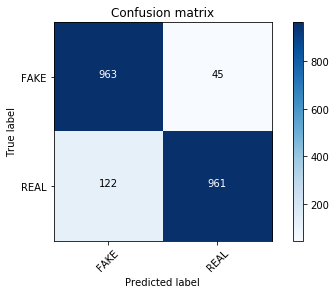

In [55]:
pa_hash_clf.fit(hash_train, y_train)
pred = pa_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [56]:
svc_count_clf = LinearSVC()

accuracy:   87.901 %
Confusion matrix, without normalization


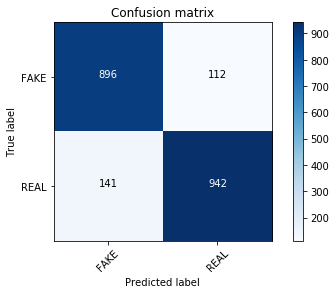

In [57]:
svc_count_clf.fit(count_train, y_train)
pred = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [58]:
svc_tfidf_clf = LinearSVC()

accuracy:   93.639 %
Confusion matrix, without normalization


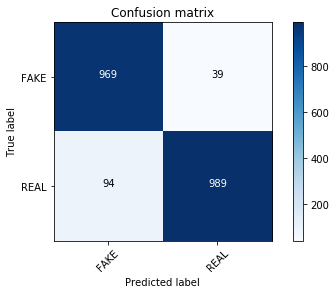

In [59]:
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [60]:
svc_hash_clf = LinearSVC()

accuracy:   93.018 %
Confusion matrix, without normalization


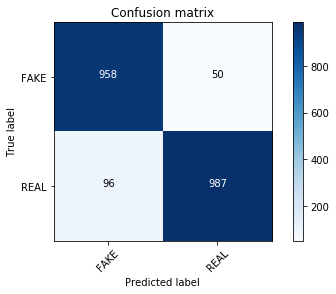

In [61]:
svc_hash_clf.fit(hash_train, y_train)
pred = svc_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [62]:
sgd_count_clf = SGDClassifier()

accuracy:   90.531 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


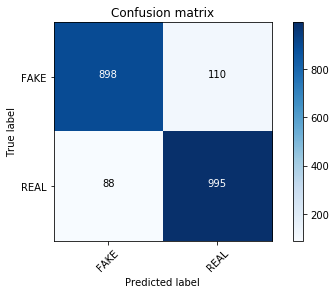

In [63]:
sgd_count_clf.fit(count_train, y_train)
pred = sgd_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [64]:
sgd_tfidf_clf = SGDClassifier()

accuracy:   93.687 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


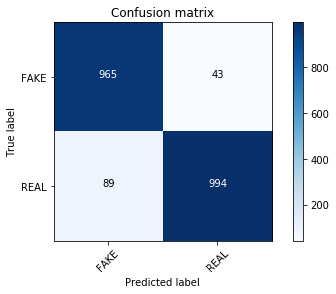

In [65]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [66]:
sgd_hash_clf = SGDClassifier()

accuracy:   92.922 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


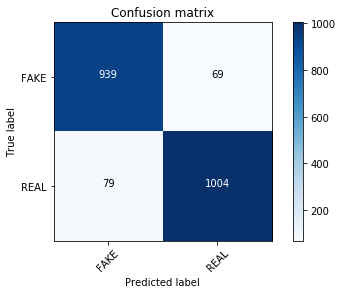

In [67]:
sgd_hash_clf.fit(hash_train, y_train)
pred = sgd_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [68]:
sgd_tfidf_clf.decision_function

<bound method LinearClassifierMixin.decision_function of SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)>

In [69]:
mn_count_clf.predict_proba

<bound method BaseNB.predict_proba of MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)>

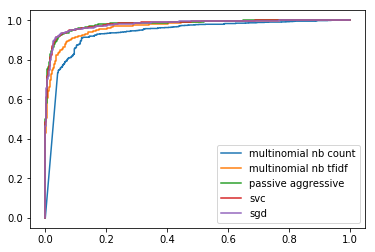

In [70]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_tfidf_clf, 'passive aggressive'),
                     (svc_tfidf_clf, 'svc'),
                     (sgd_tfidf_clf, 'sgd')]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)

In [71]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, pa_tfidf_clf, n=50)

{'FAKE': [(-4.818820931441238, '2016'),
  (-4.445228268106735, 'october'),
  (-3.890935125491181, 'hillary'),
  (-3.237040614726318, 'share'),
  (-2.8320326692186315, 'november'),
  (-2.760105874796776, 'article'),
  (-2.414331524803058, 'print'),
  (-2.319030313087208, 'advertisement'),
  (-2.3094395954791826, 'mosul'),
  (-2.2631767104269884, 'war'),
  (-2.240325447549015, 'oct'),
  (-2.1716468725762406, 'email'),
  (-2.1272294233911895, 'podesta'),
  (-2.1081107730666195, 'source'),
  (-2.0164831520664115, 'election'),
  (-1.882575175413642, 'establishment'),
  (-1.8562475274484445, 'corporate'),
  (-1.7533394632028407, 'nov'),
  (-1.750695832591096, 'wikileaks'),
  (-1.7153048478205648, 'snip'),
  (-1.6701311729664927, 'posts'),
  (-1.6546254495434125, 'donald'),
  (-1.6318654543038649, 'jewish'),
  (-1.6268182081082083, '26'),
  (-1.6247725073958847, 'com'),
  (-1.5953326922395679, 'photo'),
  (-1.5888916482246633, 'entire'),
  (-1.5799859284523134, '28'),
  (-1.5785179088427477, 

In [72]:
classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (pa_tfidf_clf, tfidf_vectorizer),
               (svc_tfidf_clf, tfidf_vectorizer),
               (sgd_tfidf_clf, tfidf_vectorizer)]

In [73]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [74]:
results

{MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {'FAKE': [(-16.067750538483136,
    '0000'),
   (-16.067750538483136, '000035'),
   (-16.067750538483136, '0001'),
   (-16.067750538483136, '0001pt'),
   (-16.067750538483136, '000km'),
   (-16.067750538483136, '0011'),
   (-16.067750538483136, '006s'),
   (-16.067750538483136, '007'),
   (-16.067750538483136, '007s'),
   (-16.067750538483136, '008s')],
  'REAL': [(-5.675959082863306, 'republican'),
   (-5.582298794347825, 'campaign'),
   (-5.520542422049422, 'new'),
   (-5.463370874939617, 'state'),
   (-5.459162531269605, 'obama'),
   (-5.429949870021241, 'president'),
   (-5.403667459399097, 'people'),
   (-4.929358535752954, 'clinton'),
   (-4.541306857712, 'trump'),
   (-4.424753408851144, 'said')]},
 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {'FAKE': [(-12.641778440826338,
    '0000'),
   (-12.641778440826338, '000035'),
   (-12.641778440826338, '0001'),
   (-12.641778440826338, '0001pt'),
   (-12.6417

In [75]:
comparable_results = {'REAL': {}, 'FAKE': {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [76]:
comparable_results['FAKE']

{'0000': [(1, 'MultinomialNB'), (1, 'MultinomialNB')],
 '000035': [(2, 'MultinomialNB'), (2, 'MultinomialNB')],
 '0001': [(3, 'MultinomialNB'), (3, 'MultinomialNB')],
 '0001pt': [(4, 'MultinomialNB'), (4, 'MultinomialNB')],
 '000km': [(5, 'MultinomialNB'), (5, 'MultinomialNB')],
 '0011': [(6, 'MultinomialNB'), (6, 'MultinomialNB')],
 '006s': [(7, 'MultinomialNB'), (7, 'MultinomialNB')],
 '007': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 '007s': [(9, 'MultinomialNB'), (9, 'MultinomialNB')],
 '008s': [(10, 'MultinomialNB'), (10, 'MultinomialNB')],
 '2016': [(1, 'PassiveAggressiveClassifier'),
  (1, 'LinearSVC'),
  (2, 'SGDClassifier')],
 'october': [(2, 'PassiveAggressiveClassifier'),
  (3, 'LinearSVC'),
  (3, 'SGDClassifier')],
 'hillary': [(3, 'PassiveAggressiveClassifier'),
  (2, 'LinearSVC'),
  (1, 'SGDClassifier')],
 'share': [(4, 'PassiveAggressiveClassifier'),
  (6, 'LinearSVC'),
  (5, 'SGDClassifier')],
 'november': [(5, 'PassiveAggressiveClassifier'),
  (5, 'LinearSVC'),
  (

In [77]:
comparable_results['REAL']

{'republican': [(1, 'MultinomialNB'), (3, 'MultinomialNB')],
 'campaign': [(2, 'MultinomialNB'), (4, 'MultinomialNB')],
 'new': [(3, 'MultinomialNB')],
 'state': [(4, 'MultinomialNB'), (2, 'MultinomialNB')],
 'obama': [(5, 'MultinomialNB'), (7, 'MultinomialNB')],
 'president': [(6, 'MultinomialNB'), (5, 'MultinomialNB')],
 'people': [(7, 'MultinomialNB')],
 'clinton': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 'trump': [(9, 'MultinomialNB'), (10, 'MultinomialNB')],
 'said': [(10, 'MultinomialNB'),
  (9, 'MultinomialNB'),
  (10, 'PassiveAggressiveClassifier'),
  (10, 'LinearSVC'),
  (10, 'SGDClassifier')],
 'cruz': [(1, 'MultinomialNB'),
  (8, 'PassiveAggressiveClassifier'),
  (3, 'LinearSVC'),
  (3, 'SGDClassifier')],
 'sanders': [(6, 'MultinomialNB')],
 'monday': [(1, 'PassiveAggressiveClassifier'),
  (2, 'LinearSVC'),
  (2, 'SGDClassifier')],
 'conservative': [(2, 'PassiveAggressiveClassifier'),
  (6, 'LinearSVC'),
  (8, 'SGDClassifier')],
 'gop': [(3, 'PassiveAggressiveClassifie

In [78]:
agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [79]:
comparison_df = pd.DataFrame(agg_results).T

In [80]:
comparison_df.head(5)

,agg_rank,count,label
republican,2,2,REAL
campaign,3,2,REAL
new,3,1,REAL
state,3,2,REAL
obama,6,2,REAL


In [81]:
comparison_df[comparison_df['label'] == 'REAL'].sort_values('count', ascending=0).head(10)

,agg_rank,count,label
said,9.8,5,REAL
cruz,3.75,4,REAL
says,7,3,REAL
gop,4,3,REAL
conservative,5.33333,3,REAL
monday,1.66667,3,REAL
tuesday,9,3,REAL
islamic,6.66667,3,REAL
friday,2.5,2,REAL
campaign,3,2,REAL


In [82]:
comparison_df[comparison_df['label'] == 'FAKE'].sort_values('count', ascending=0).head()

,agg_rank,count,label
october,2.66667,3,FAKE
2016,1.33333,3,FAKE
war,9.66667,3,FAKE
print,7.33333,3,FAKE
article,4.66667,3,FAKE


In [160]:
# deepika srivastava from gorakhpur bihar

In [111]:
df1=pd.read_csv("training_dataset.csv")

In [114]:
y_val=df1.label

In [115]:
df1 = df1.drop('label', axis=1)

In [117]:
x1_test=df1['text']

In [118]:
count_test_for_other = count_vectorizer.transform(x1_test)

tfidf_test_for_other = tfidf_vectorizer.transform(x1_test)

hash_test_for_other = hash_vectorizer.transform(x1_test)

accuracy:   97.790 %
Confusion matrix, without normalization


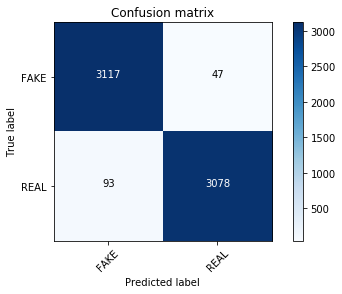

In [125]:
predicted_value = sgd_tfidf_clf.predict(tfidf_test_for_other)
score = metrics.accuracy_score(y_val, predicted_value)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_val, predicted_value, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   81.673 %
Confusion matrix, without normalization


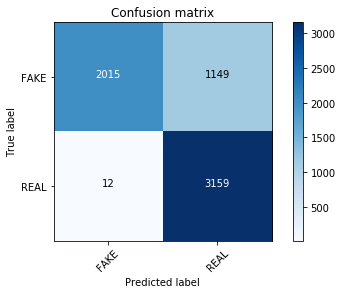

In [146]:
predicted_value = sgd_tfidf_clf.predict(count_test_for_other)
score = metrics.accuracy_score(y_val, predicted_value)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_val, predicted_value, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [130]:
table=pd.DataFrame({"text":df.text,"Actual":y_val,"predicted":predicted_value})

In [162]:
check=input("enetr your news")
ser=[]
ser.append(check)
count_for_other = count_vectorizer.transform(ser)
tfidf_for_other = tfidf_vectorizer.transform(ser)
hash_for_other = hash_vectorizer.transform(ser)
predicted_by_tfifd = sgd_tfidf_clf.predict(count_for_other)



enetr your newsprint(predicted_by_tfifd)


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [163]:
print(predicted_by_tfifd)

['FAKE']


In [150]:
predicted_value212 = sgd_tfidf_clf.predict(count_for_other)

In [151]:
predicted_value212

array(['REAL'], dtype='<U4')